<a href="https://colab.research.google.com/github/zakaria-bourouba/data_analysis/blob/main/cars_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Avancée des Données de Ventes de Voitures

**Auteur:** Zakaria Bourouba  
**Date:** 04/04/2024  

## Résumé

Ce document présente une exploration approfondie et une analyse prédictive des données de ventes de voitures, employant des techniques avancées de data science et de machine learning. En utilisant un ensemble de données exhaustif disponible sur [Kaggle](https://www.kaggle.com/datasets/gagandeep16/car-sales), nous appliquons des analyses statistiques, de la visualisation des données, et des modèles prédictifs, tels que la régression linéaire et l'analyse en composantes principales (PCA), pour déceler les tendances sous-jacentes et prédire les futurs comportements de vente.

## Introduction

Dans un marché automobile de plus en plus compétitif, comprendre les dynamiques de vente et prévoir les tendances futures sont essentiels pour les décideurs et les analystes. Ce projet tire parti d'un riche ensemble de données sur les ventes de voitures, combinant des techniques de traitement de données, de visualisation et d'analyse prédictive pour offrir des insights détaillés sur le marché. À travers des méthodes quantitatives rigoureuses et des modèles de machine learning, nous explorons les facteurs influençant les ventes de voitures et développons des modèles capables de prédire les tendances de vente. Cette approche analytique fournit une base solide pour la prise de décision stratégique dans l'industrie automobile.



In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
!pip install prince
import prince
data= pd.read_csv('Car_sales.csv')
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [113]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [114]:
data['Manufacturer'].value_counts()

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

In [115]:
data['Vehicle_type'].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [116]:
data['Model'].value_counts()

Model
Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: count, Length: 156, dtype: int64

In [117]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [118]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [119]:
# Calcul de la médiane de 'Price_in_thousands' pour chaque 'Manufacturer'
median_price_by_manufacturer = data.groupby('Manufacturer')['Price_in_thousands'].transform('median')

# Remplacement des valeurs manquantes dans 'Price_in_thousands' par la médiane du groupe correspondant
data['Price_in_thousands'].fillna(median_price_by_manufacturer, inplace=True)

# Si après cette opération, il reste encore des valeurs manquantes dans 'Price_in_thousands' (peut-être parce que certains groupes avaient toutes leurs valeurs manquantes),
# vous pouvez choisir de les remplacer par la médiane globale ou une autre statistique de votre choix :
global_median_price = data['Price_in_thousands'].median()
data['Price_in_thousands'].fillna(global_median_price, inplace=True)

# Vérifiez s'il reste des valeurs manquantes
print(data['Price_in_thousands'].isnull().sum())


0


In [120]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [121]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Configuration de l'IterativeImputer avec un RandomForestRegressor pour estimer les valeurs manquantes
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# Sélection des colonnes numériques pour l'imputation
numerical_data = data.select_dtypes(include=[np.number])

# Application de l'imputation
imputed_data = imputer.fit_transform(numerical_data)

# Création d'un DataFrame avec les données imputées pour remplacer les valeurs dans car_sales_data
imputed_data_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

# Mise à jour de car_sales_data avec les valeurs imputées pour '__year_resale_value'
data['__year_resale_value'] = imputed_data_df['__year_resale_value']

# Vérification des résultats
print(imputed_data_df.head())


   Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360               21.50          1.8   
1              39.384               19.875               28.40          3.2   
2              14.114               18.225               28.40          3.2   
3               8.588               29.725               42.00          3.5   
4              20.397               22.255               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
2       225.0      106.9   70.6   192.0        3.470           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   

   Fuel_efficiency  Power_perf_factor  
0             28.0          58.280150  
1             25.0

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [122]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [123]:

imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)


numerical_data = data.select_dtypes(include=[np.number])

imputed_data = imputer.fit_transform(numerical_data)


imputed_data_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

for col in numerical_data.columns:
    data[col] = imputed_data_df[col]


missing_values_after_imputation = data.select_dtypes(include=[np.number]).isnull().sum()

missing_values_after_imputation


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [124]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36000,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.87500,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.22500,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,92.587667
3,Acura,RL,8.588,29.72500,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.25500,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,19.09255,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,19.81725,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,20.46740,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,37.39710,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




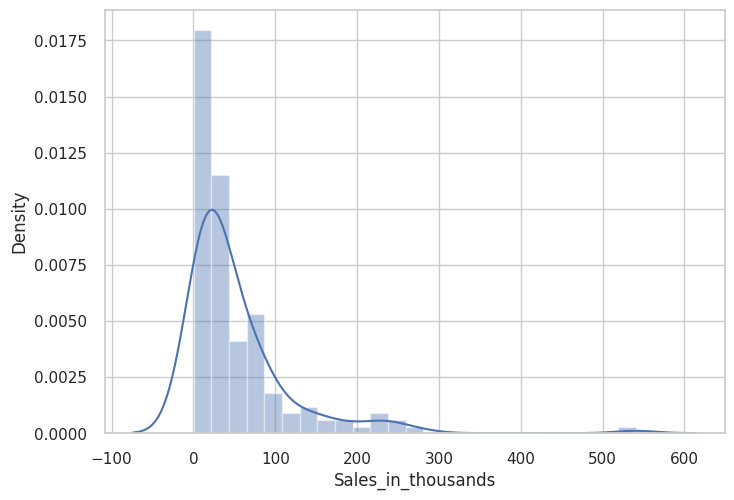

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




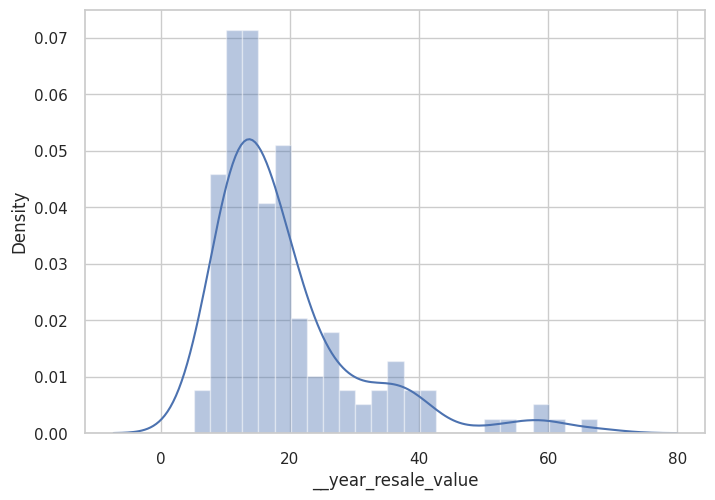

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




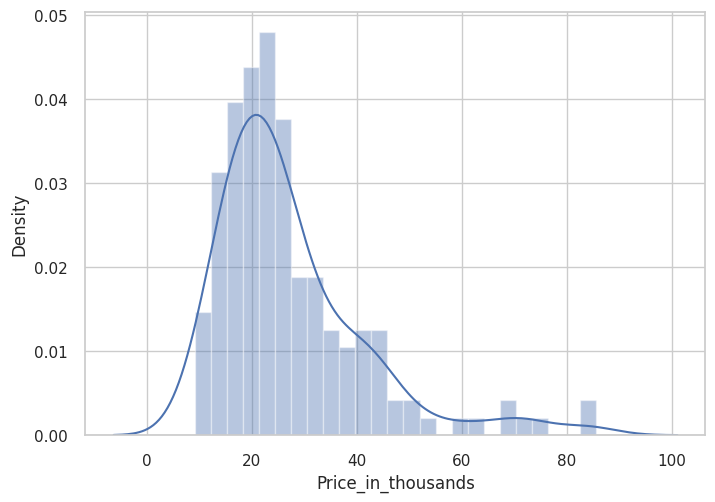

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




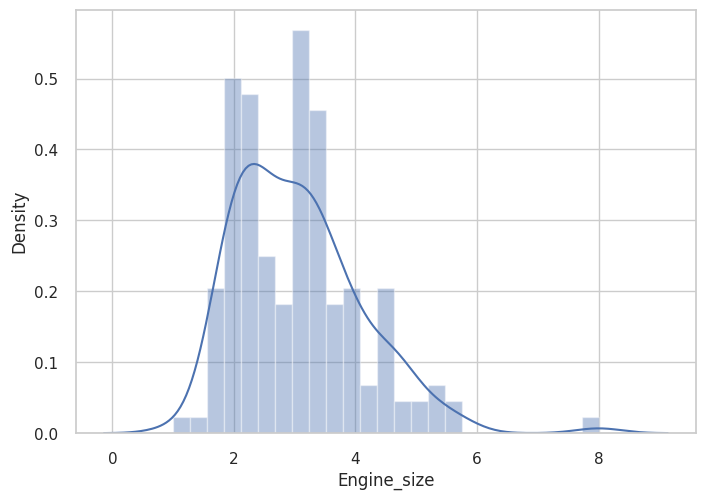

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




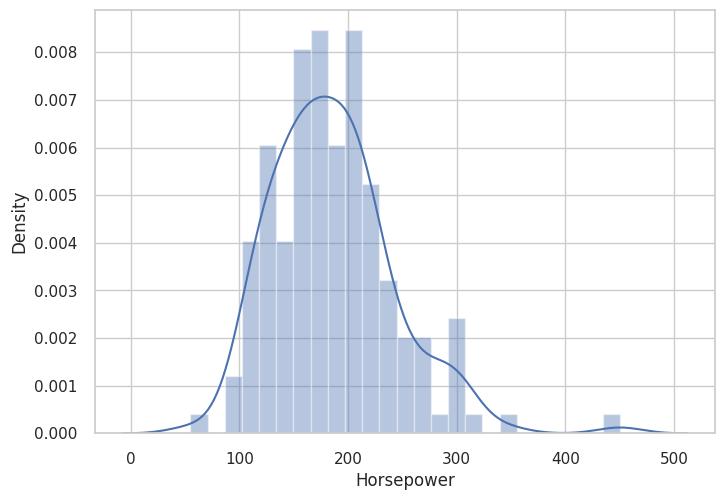

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




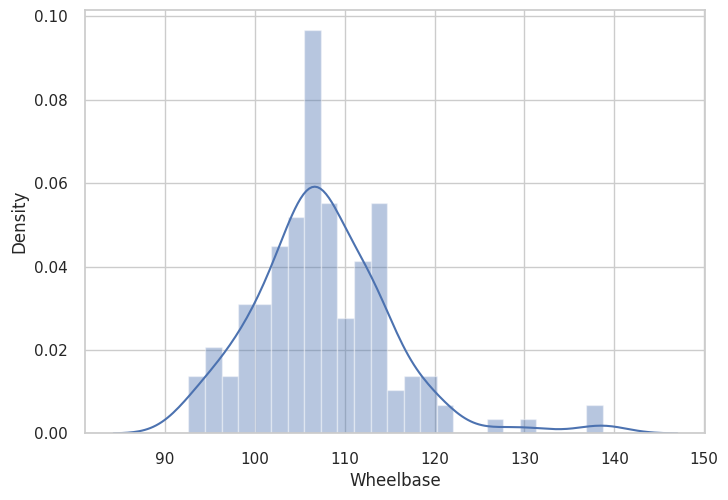

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




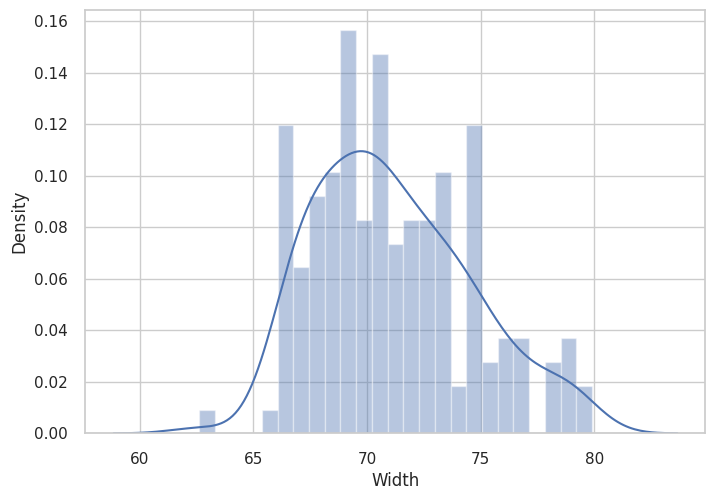

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




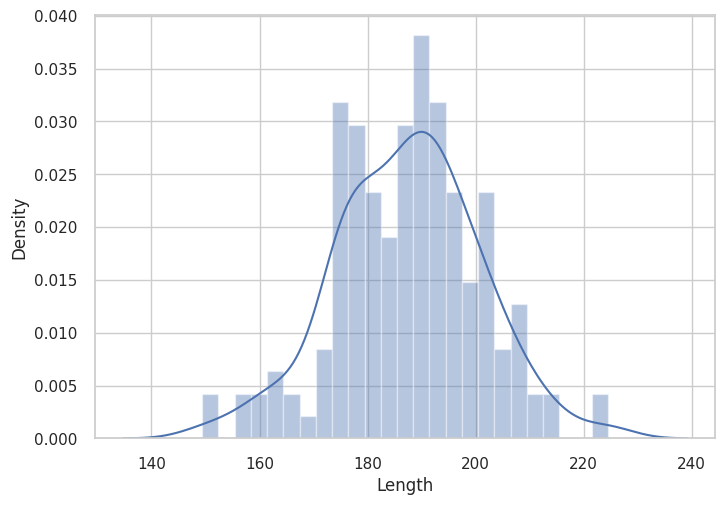

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




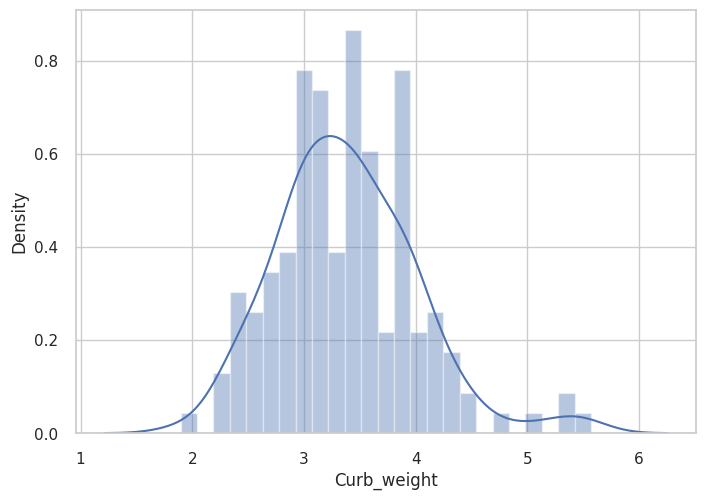

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




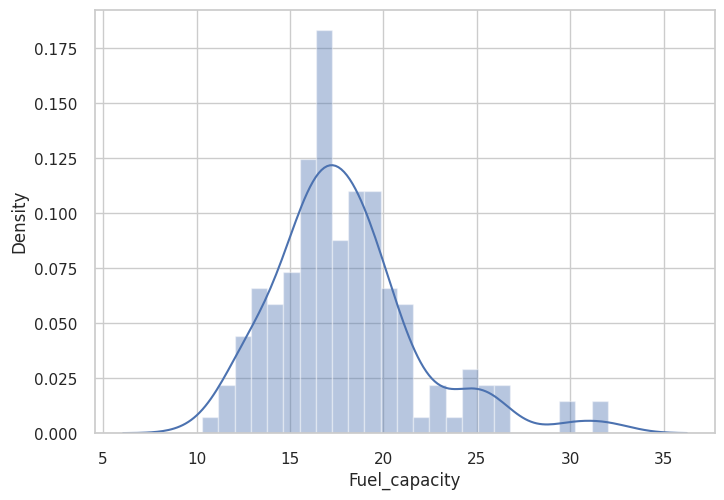

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




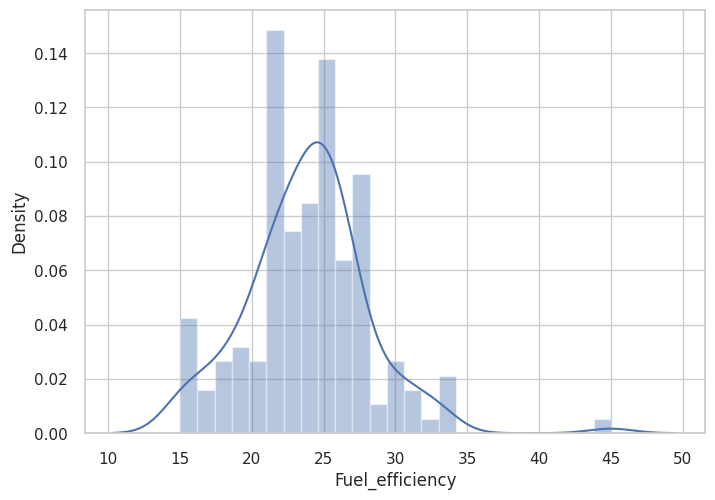

<ipython-input-125-8e0ec67eaaa8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




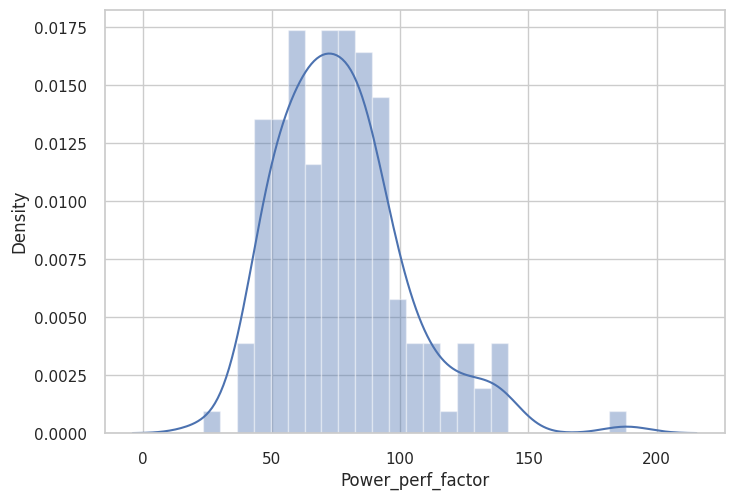

In [125]:
for i in data:
    if not (data[i].dtypes== 'object'):
        sns.distplot(data.loc[:, i], bins=25)
        plt.show()

In [126]:
data['Horsepower'].value_counts()

Horsepower
150.0    9
170.0    9
200.0    8
210.0    7
115.0    6
        ..
227.0    1
290.0    1
113.0    1
154.0    1
201.0    1
Name: count, Length: 67, dtype: int64

<ipython-input-127-056f583d9f9b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




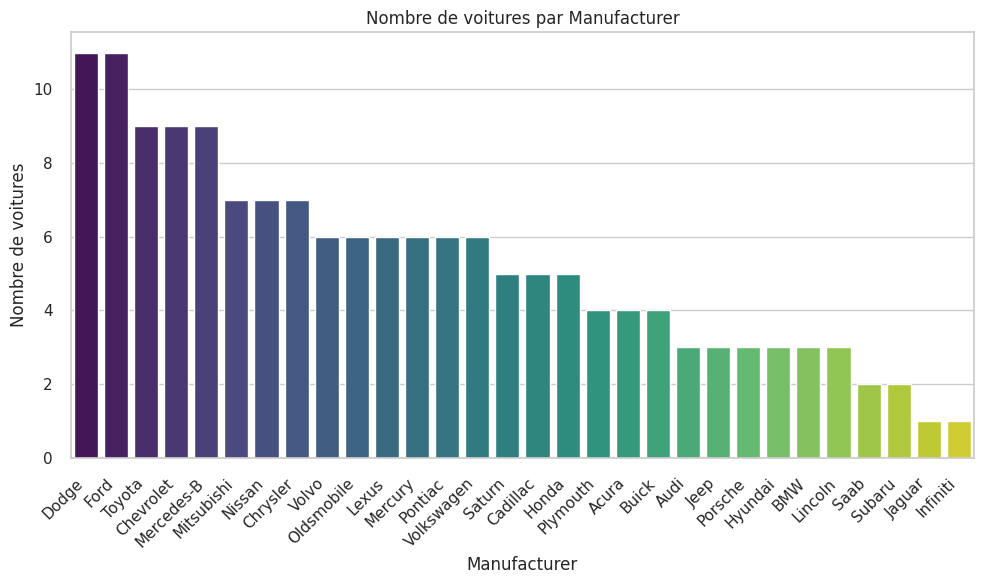

<ipython-input-127-056f583d9f9b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




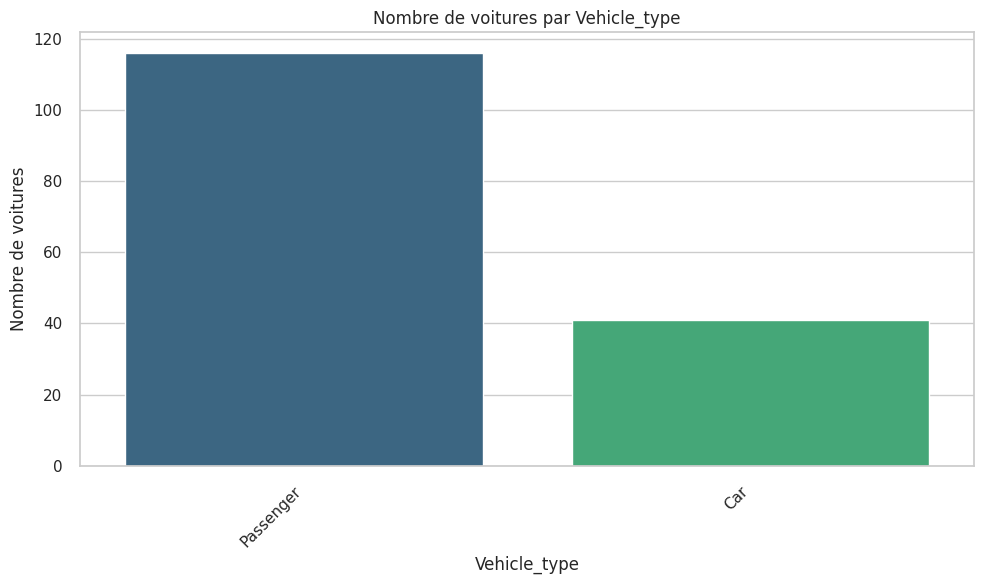

In [127]:
sns.set(style="whitegrid")
columns_to_visualize = ['Manufacturer', 'Vehicle_type']

for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    value_counts = data[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f'Nombre de voitures par {col}')
    plt.ylabel('Nombre de voitures')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

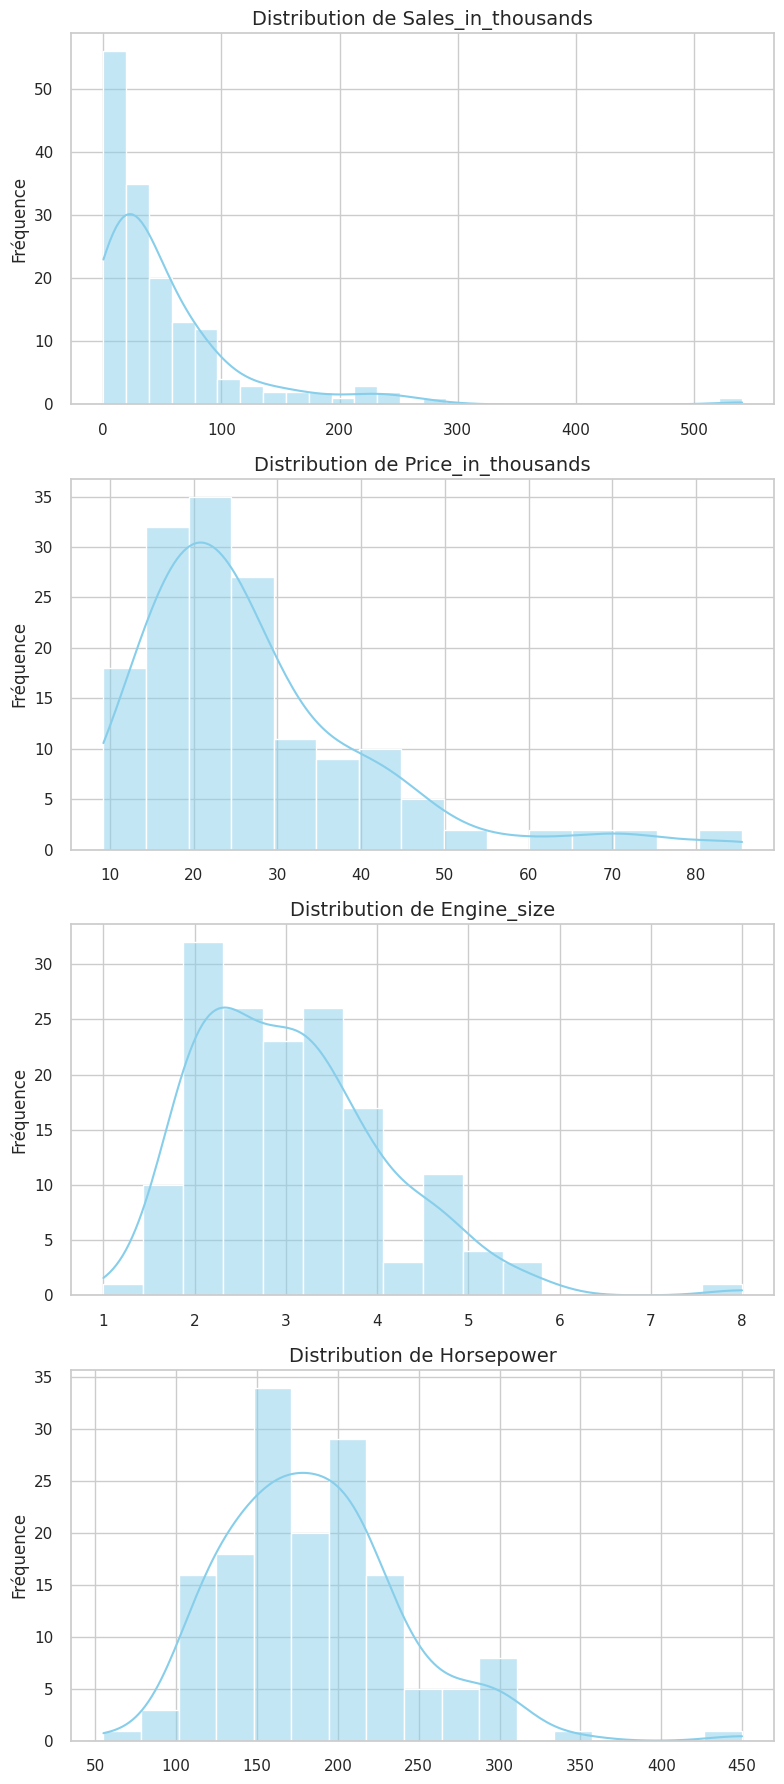

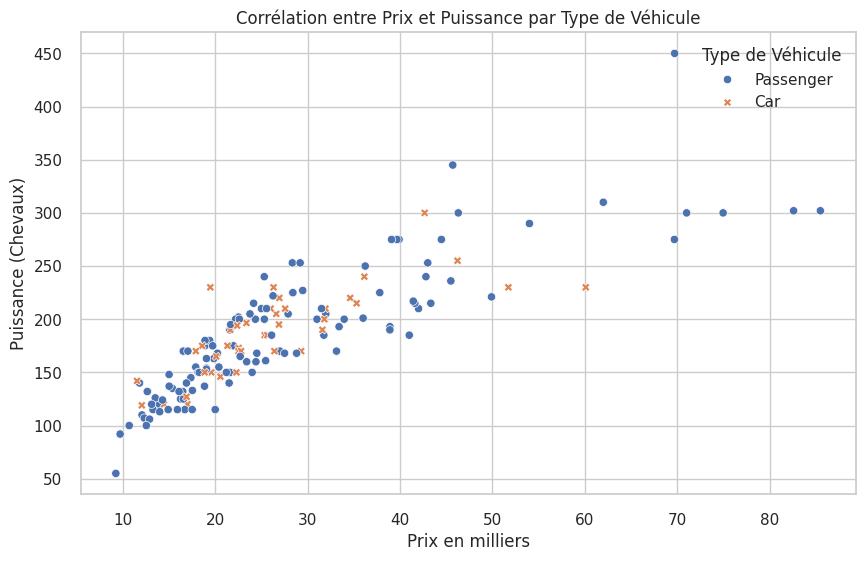

In [128]:
numerical_features = ['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 18))

for i, col in enumerate(numerical_features):
    sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution de {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price_in_thousands', y='Horsepower', hue='Vehicle_type', style='Vehicle_type', palette="deep")
plt.title('Corrélation entre Prix et Puissance par Type de Véhicule')
plt.xlabel('Prix en milliers')
plt.ylabel('Puissance (Chevaux)')
plt.legend(title='Type de Véhicule')
plt.grid(True)
plt.show()


# Bivariate Processing

In [129]:
Price_car = data['Price_in_thousands']
Horsepower= data['Horsepower']
cc= Price_car.corr(Horsepower)
print(cc)

0.838110269467294


<ipython-input-130-d654c0efd391>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



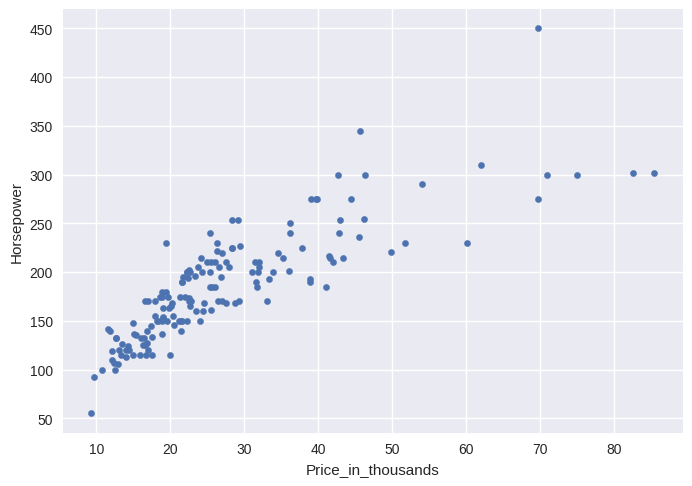

In [130]:
plt.style.use('seaborn')

data.plot(x="Price_in_thousands", y="Horsepower", kind='scatter')
plt.show()

In [131]:
Price_car= np.array(data['Price_in_thousands']).reshape(-1,1)
Horsepower= np.array(data['Horsepower']).reshape(-1,1)
model = LinearRegression().fit(Price_car, Horsepower)
r_sq= model.score(Price_car,Horsepower)
print(model.intercept_)
print(model.coef_)
print(r_sq)

[95.10379457]
[[3.32139747]]
0.7024288237865403


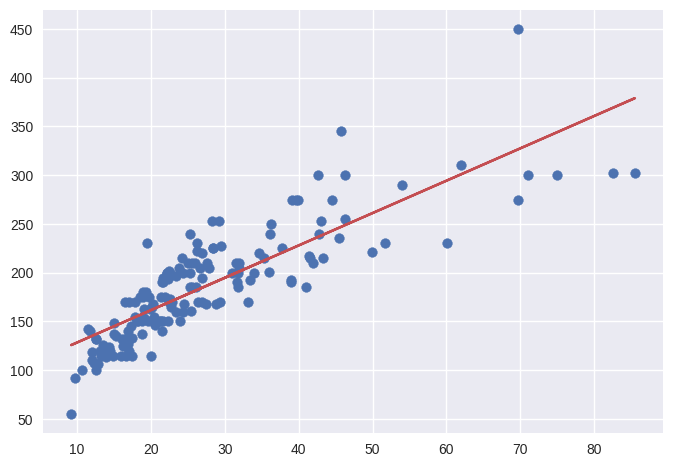

In [132]:
x=data.loc[:,"Price_in_thousands"].values
y=data.loc[:,"Horsepower"].values
y=y.reshape(-1,1)
plt.scatter(x, y)
plt.plot(x, 	95.10870489 + 	3.32133443*x, 'r', )
plt.show()

In [133]:
Price_car = data['Price_in_thousands']
Power_car= data['Power_perf_factor']
cc= Price_car.corr(Power_car)
print(cc)

0.8966262606402549


<ipython-input-134-fd779f89d61d>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



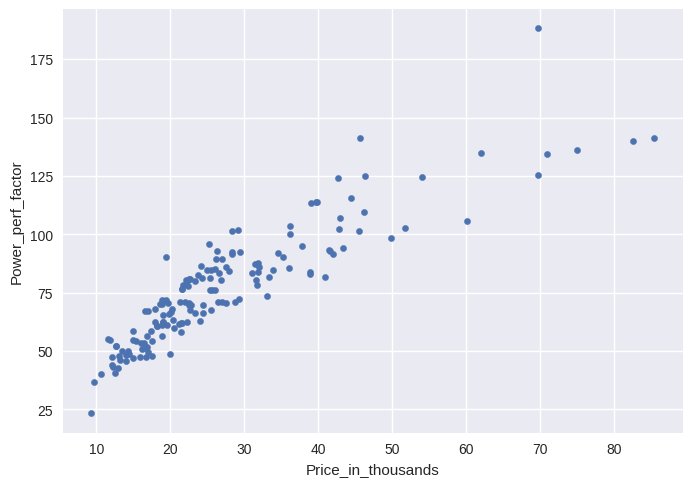

In [134]:
plt.style.use('seaborn')

data.plot(x="Price_in_thousands", y="Power_perf_factor", kind='scatter')
plt.show()

In [135]:
Price_car= np.array(data['Price_in_thousands']).reshape(-1,1)
Power_car= np.array(data['Power_perf_factor']).reshape(-1,1)
model = LinearRegression().fit(Price_car, Power_car)
r_sq= model.score(Price_car,Power_car)
print(model.intercept_)
print(model.coef_)
print(r_sq)

[34.12350012]
[[1.57238061]]
0.8039386512697262


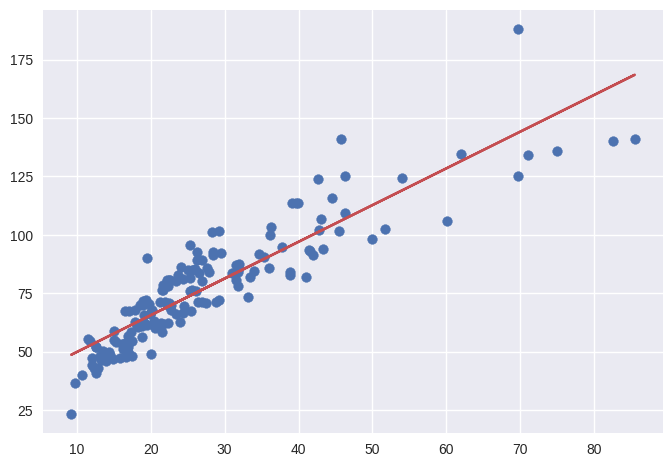

In [136]:
x=data.loc[:,"Price_in_thousands"].values
y=data.loc[:,"Power_perf_factor"].values
y=y.reshape(-1,1)
plt.scatter(x, y)
plt.plot(x, 	34.12444266 + 	1.57238531*x, 'r', )
plt.show()

# Multivariate Processing


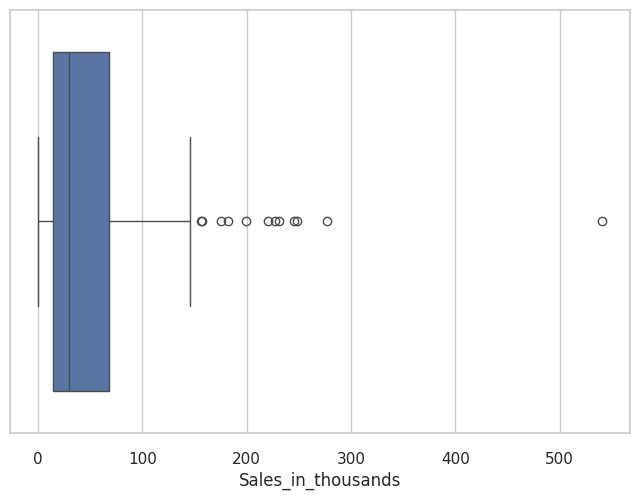

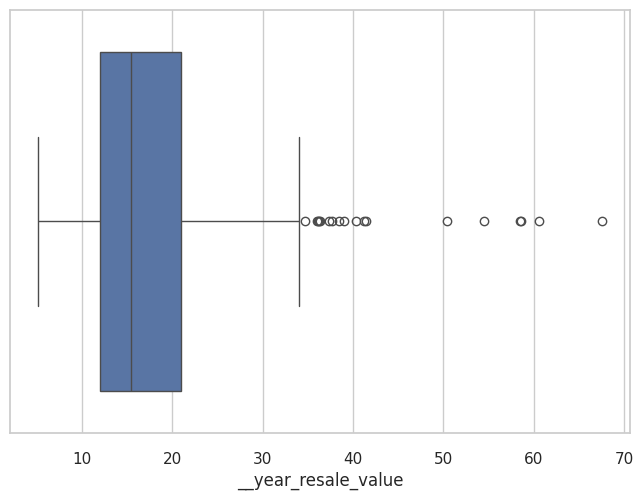

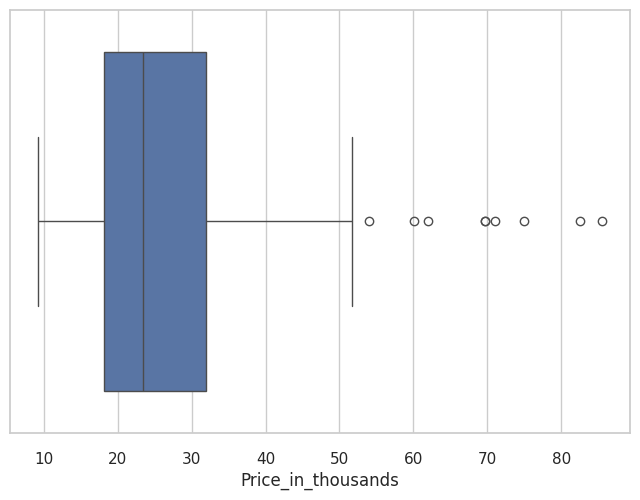

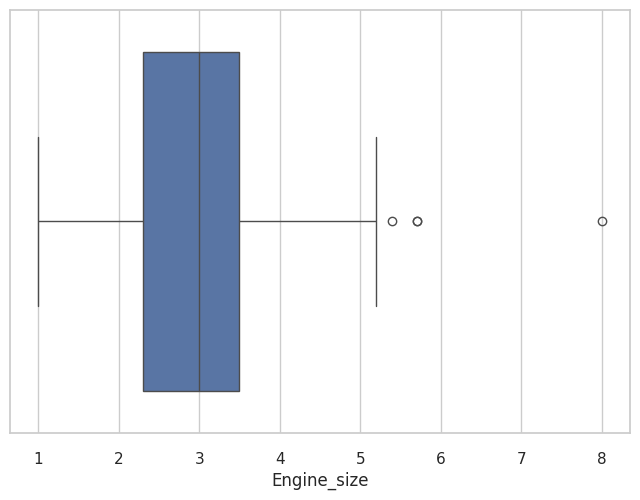

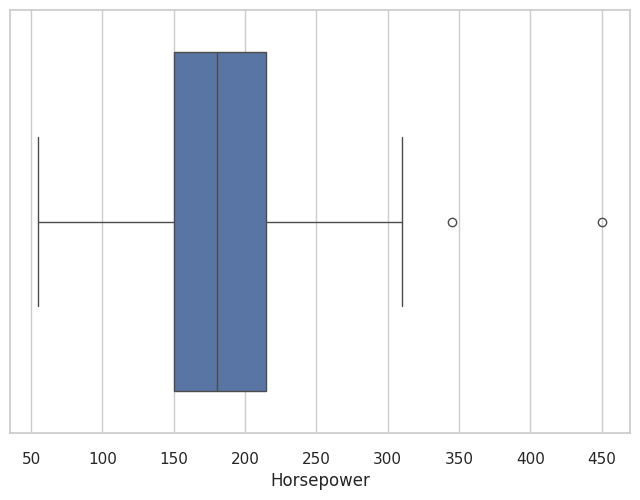

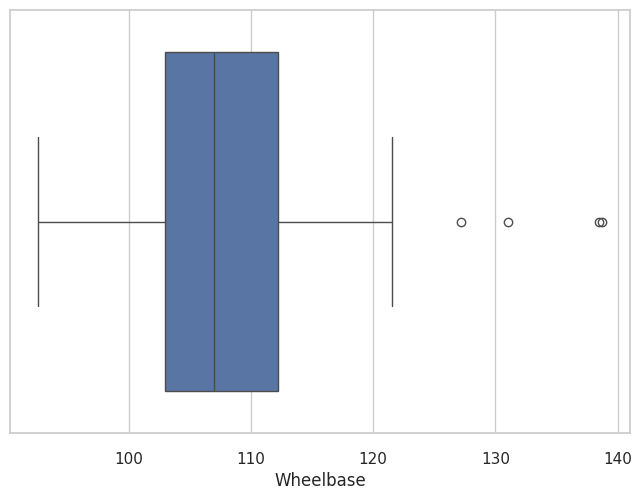

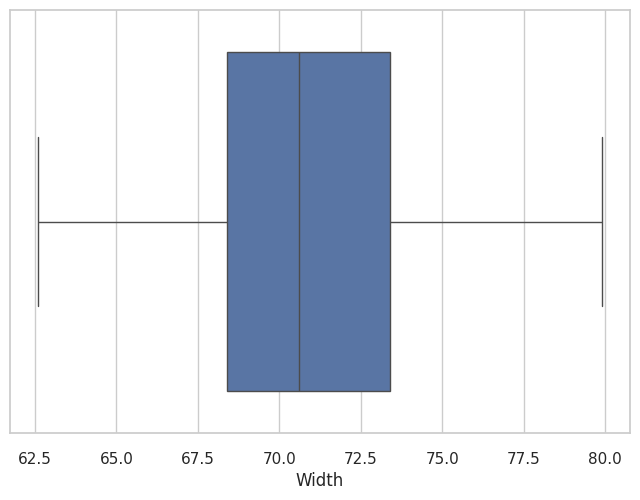

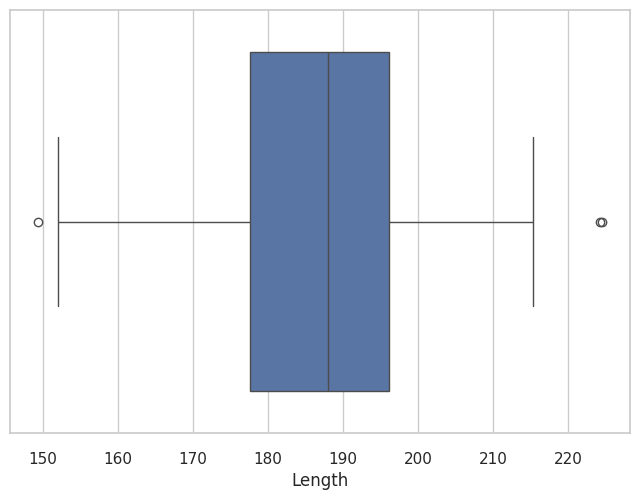

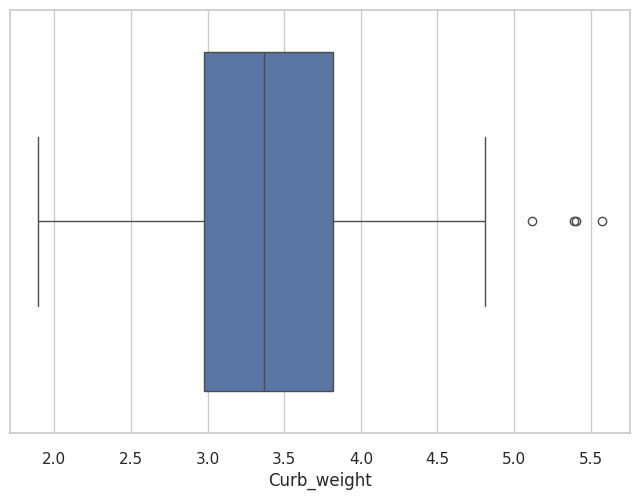

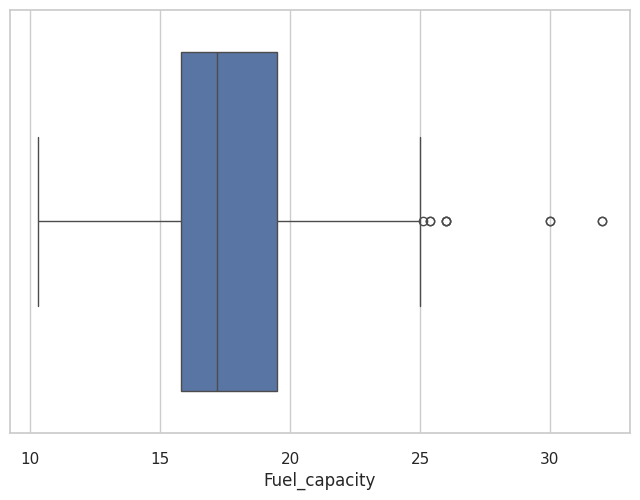

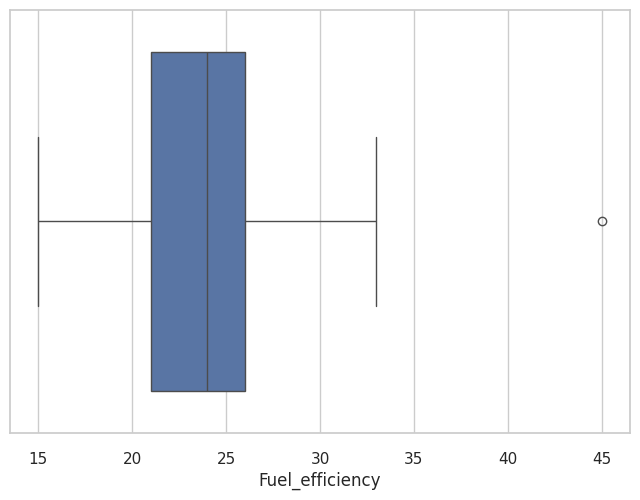

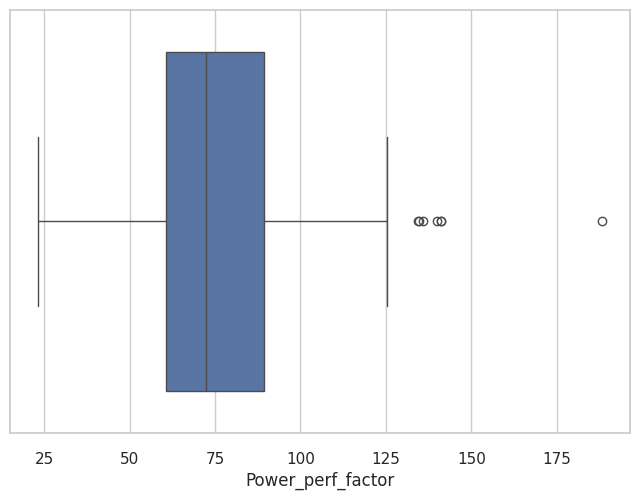

In [137]:
for i in data:
  if not(data[i].dtypes== 'object'):

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=data[i])
    plt.show()

In [138]:
variables_quantitatives = data.select_dtypes(include=[np.number]).columns.tolist()

print(variables_quantitatives)

['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']


In [139]:
data[variables_quantitatives]=StandardScaler().fit_transform(data[variables_quantitatives])
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,-0.532042,-0.243553,Passenger,-0.412976,-1.215215,-0.816688,-0.827593,-1.121655,-1.121067,-1.186771,-1.229770,0.975842,2/2/2012,-0.757302
1,Acura,TL,-0.200761,0.066016,Passenger,0.072334,0.133538,0.691896,0.081185,-0.247016,0.414686,0.216215,-0.194334,0.266976,6/3/2011,0.569875
2,Acura,CL,-0.573406,-0.079301,Passenger,0.072334,0.133538,0.691896,-0.076863,-0.159552,0.347262,0.141112,-0.194334,0.503265,1/4/2012,0.618682
3,Acura,RL,-0.654896,0.933512,Passenger,1.028888,0.422556,0.425675,0.937281,0.073685,0.691871,0.748326,0.012753,-0.441890,3/10/2011,0.570637
4,Audi,A4,-0.480754,0.275624,Passenger,-0.237842,-1.215215,-0.639208,-0.643203,-0.859263,-0.701545,-0.613113,-0.401421,0.739553,10/8/2011,-0.576920


In [140]:
data_quant = data.select_dtypes(include=[np.number])
data_quant.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.331521,-0.304603,0.019986,-0.197726,0.358169,0.140906,0.254942,0.005741,0.086537,-0.015671,-0.225004
__year_resale_value,-0.331521,1.000000,0.952368,0.492969,0.761059,-0.027278,0.189219,-0.010556,0.371615,0.320529,-0.401005,0.823129
Price_in_thousands,-0.304603,0.952368,1.000000,0.626586,0.838110,0.110577,0.329156,0.156517,0.528674,0.423112,-0.492431,0.896626
Engine_size,0.019986,0.492969,0.626586,1.000000,0.837341,0.472079,0.690293,0.541426,0.760832,0.662983,-0.733302,0.818011
Horsepower,-0.197726,0.761059,0.838110,0.837341,1.000000,0.286184,0.538924,0.393536,0.612238,0.499791,-0.608078,0.992983
Wheelbase,0.358169,-0.027278,0.110577,0.472079,0.286184,1.000000,0.683148,0.839347,0.651999,0.654051,-0.494455,0.258149
Width,0.140906,0.189219,0.329156,0.690293,0.538924,0.683148,1.000000,0.710067,0.722227,0.656303,-0.595306,0.510573
Length,0.254942,-0.010556,0.156517,0.541426,0.393536,0.839347,0.710067,1.000000,0.629083,0.563351,-0.438800,0.355007
Curb_weight,0.005741,0.371615,0.528674,0.760832,0.612238,0.651999,0.722227,0.629083,1.000000,0.862745,-0.816653,0.613962
Fuel_capacity,0.086537,0.320529,0.423112,0.662983,0.499791,0.654051,0.656303,0.563351,0.862745,1.000000,-0.801258,0.499671


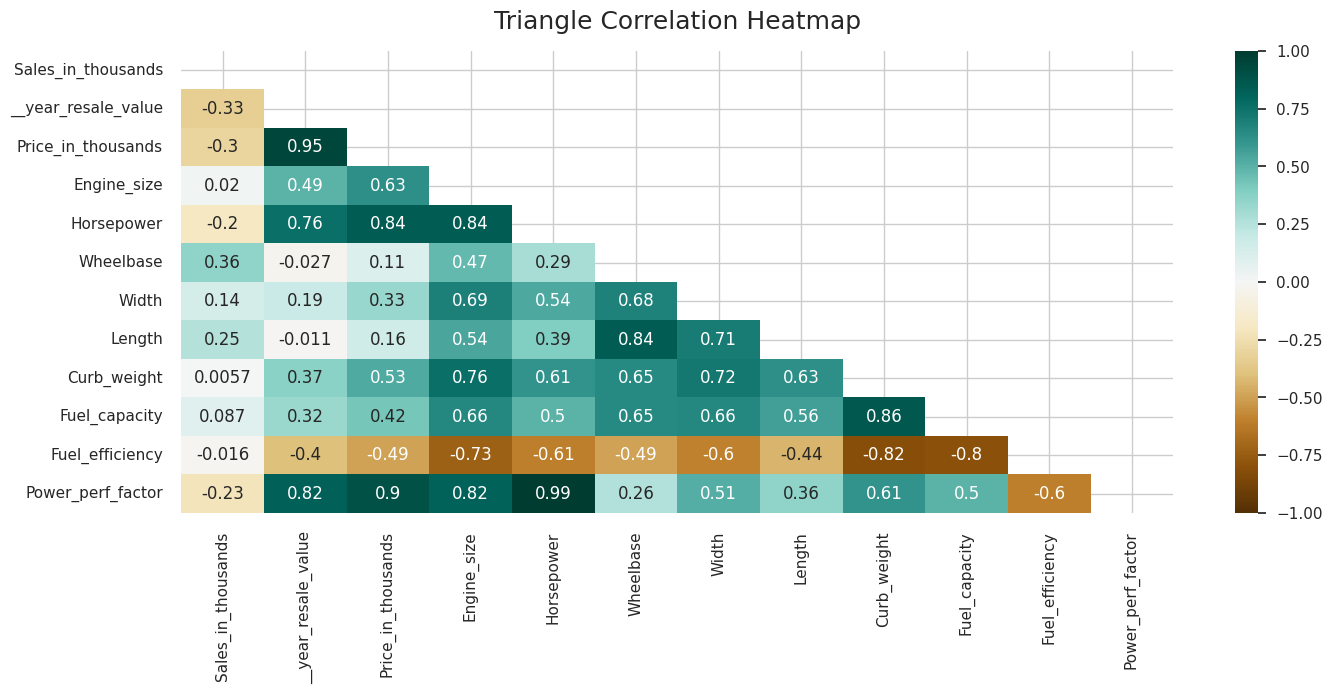

In [141]:
plt.figure(figsize=(16, 6))
# Définition du masque pour mettre les valeurs dans le triangle supérieur à True
mask = np.triu(np.ones_like(data_quant.corr(), dtype=bool))
heatmap = sns.heatmap(data_quant.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [142]:
datacov=data_quant.cov()
datacov

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.006410,-0.333646,-0.306556,0.020114,-0.198993,0.360465,0.141809,0.256576,0.005777,0.087092,-0.015772,-0.226446
__year_resale_value,-0.333646,1.006410,0.958473,0.496129,0.765938,-0.027453,0.190432,-0.010624,0.373997,0.322583,-0.403576,0.828406
Price_in_thousands,-0.306556,0.958473,1.006410,0.630603,0.843483,0.111286,0.331266,0.157520,0.532063,0.425824,-0.495588,0.902374
Engine_size,0.020114,0.496129,0.630603,1.006410,0.842708,0.475105,0.694718,0.544897,0.765709,0.667233,-0.738003,0.823254
Horsepower,-0.198993,0.765938,0.843483,0.842708,1.006410,0.288019,0.542378,0.396058,0.616163,0.502995,-0.611976,0.999348
Wheelbase,0.360465,-0.027453,0.111286,0.475105,0.288019,1.006410,0.687527,0.844727,0.656178,0.658243,-0.497625,0.259804
Width,0.141809,0.190432,0.331266,0.694718,0.542378,0.687527,1.006410,0.714619,0.726856,0.660510,-0.599122,0.513846
Length,0.256576,-0.010624,0.157520,0.544897,0.396058,0.844727,0.714619,1.006410,0.633115,0.566963,-0.441613,0.357283
Curb_weight,0.005777,0.373997,0.532063,0.765709,0.616163,0.656178,0.726856,0.633115,1.006410,0.868275,-0.821888,0.617898
Fuel_capacity,0.087092,0.322583,0.425824,0.667233,0.502995,0.658243,0.660510,0.566963,0.868275,1.006410,-0.806394,0.502874


#PCA

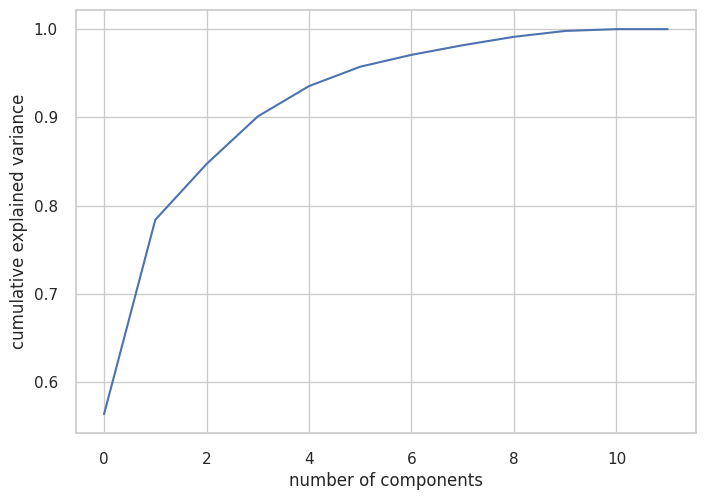

In [143]:
pca = PCA(n_components=5)
pca = PCA()
pca.fit(data[variables_quantitatives])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As we can see in the previous line chart, 2 components cover about 85% of data, which is why I'm going to proceed with 2.

In [144]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(data[variables_quantitatives])
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Manufacturer']]], axis = 1)
finalDf

,principal component 1,principal component 2,Manufacturer
0,3.014210,-1.019375,Acura
1,-0.484192,-0.339363,Acura
2,-0.342621,-0.531573,Acura
3,-1.818892,-0.492440,Acura
4,1.968698,-0.842014,Audi
...,...,...,...
152,1.898272,-1.090378,Volvo
153,0.839326,-0.468168,Volvo
154,0.759771,-0.498760,Volvo
155,-1.281480,-1.966145,Volvo


In [145]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(data[variables_quantitatives])
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Vehicle_type']]], axis = 1)
finalDf

,principal component 1,principal component 2,Vehicle_type
0,3.014210,-1.019375,Passenger
1,-0.484192,-0.339363,Passenger
2,-0.342621,-0.531573,Passenger
3,-1.818892,-0.492440,Passenger
4,1.968698,-0.842014,Passenger
...,...,...,...
152,1.898272,-1.090378,Passenger
153,0.839326,-0.468168,Passenger
154,0.759771,-0.498760,Passenger
155,-1.281480,-1.966145,Passenger


In [146]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(data[variables_quantitatives])
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Model']]], axis = 1)
finalDf

,principal component 1,principal component 2,Model
0,3.014210,-1.019375,Integra
1,-0.484192,-0.339363,TL
2,-0.342621,-0.531573,CL
3,-1.818892,-0.492440,RL
4,1.968698,-0.842014,A4
...,...,...,...
152,1.898272,-1.090378,V40
153,0.839326,-0.468168,S70
154,0.759771,-0.498760,V70
155,-1.281480,-1.966145,C70


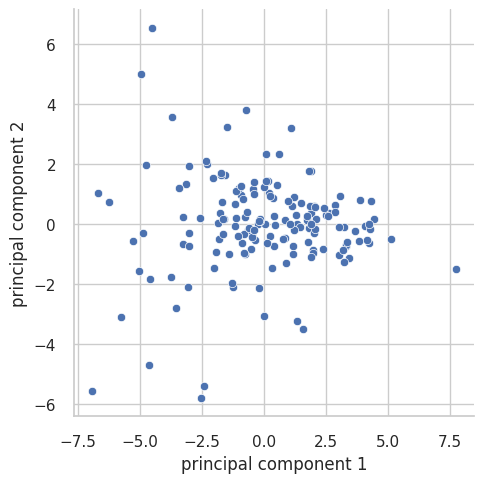

In [147]:
sns.relplot(x='principal component 1', y='principal component 2', data=finalDf);

In [148]:
import plotly.express as px

In [149]:
pca = PCA()
components = pca.fit_transform(data[variables_quantitatives])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=data["Manufacturer"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [150]:
pca = PCA()
components = pca.fit_transform(data[variables_quantitatives])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=data["Price_in_thousands"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

#Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

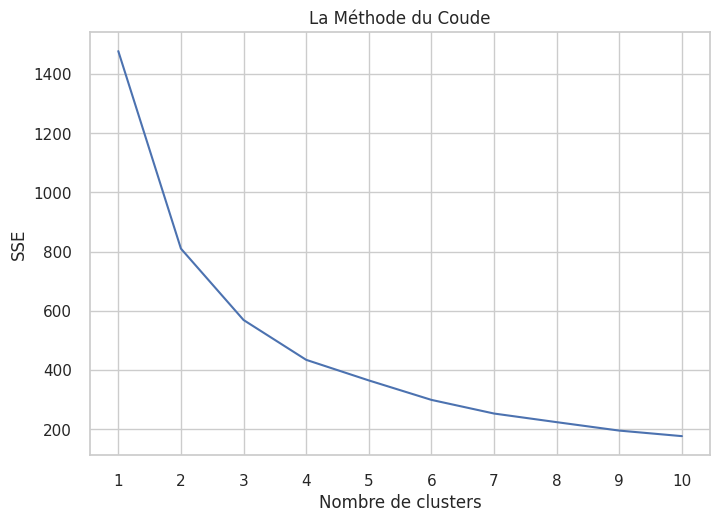

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [151]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)


plt.figure()
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.title('La Méthode du Coude')
plt.show()

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(principal_components)

n_components = 2
final_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
final_df['Cluster'] = clusters




In [152]:
final_df

,PC1,PC2,Cluster
0,3.014210,-1.019375,0
1,-0.484192,-0.339363,1
2,-0.342621,-0.531573,1
3,-1.818892,-0.492440,1
4,1.968698,-0.842014,0
...,...,...,...
152,1.898272,-1.090378,0
153,0.839326,-0.468168,0
154,0.759771,-0.498760,0
155,-1.281480,-1.966145,1


In [153]:
for cluster in sorted(final_df['Cluster'].unique()):
    print(f"Cluster {cluster} characteristics:")
    cluster_data = data[final_df['Cluster'] == cluster]

    # Statistiques descriptives pour les variables quantitatives
    stats = cluster_data[variables_quantitatives].describe().transpose()
    print(stats)

    # Résumé pour les variables catégorielles
    for col in data.select_dtypes(include=['object', 'category']).columns:
        print(cluster_data[col].value_counts())

    print("\n")


Cluster 0 characteristics:
                     count      mean       std       min       25%       50%  \
Sales_in_thousands    66.0 -0.029977  0.807632 -0.779917 -0.566616 -0.298523   
__year_resale_value   66.0 -0.436280  0.626160 -1.229944 -0.820195 -0.596676   
Price_in_thousands    66.0 -0.578628  0.490922 -1.275632 -0.917101 -0.699344   
Engine_size           66.0 -0.834236  0.386627 -1.985931 -1.022536 -0.926197   
Horsepower            66.0 -0.776621  0.500582 -2.325273 -1.153901 -0.798940   
Wheelbase             66.0 -0.667150  0.543125 -1.894420 -1.114056 -0.564179   
Width                 66.0 -0.782843  0.559885 -2.491923 -1.165387 -0.830109   
Length                66.0 -0.713917  0.742981 -2.844108 -0.995585 -0.735256   
Curb_weight           66.0 -0.849220  0.503122 -2.375633 -1.202351 -0.735355   
Fuel_capacity         66.0 -0.739899  0.497352 -1.980461 -1.197413 -0.712052   
Fuel_efficiency       66.0  0.710912  0.895229 -1.623333  0.266976  0.503265   
Power_perf_fa

In [154]:
variables_independantes = data.drop(['Price_in_thousands'], axis=1)
variables_independantes = pd.get_dummies(variables_independantes, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(variables_independantes, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Obtention des coefficients
print(model.coef_)


[[-7.72008079e-02  3.08094420e+00  1.28676643e+00  9.37202271e+00
  -6.44994881e-02  1.35349996e-02  3.52838790e-01  7.75909402e-01
  -5.19142593e-01  6.22265011e-02  1.14931775e+01  5.74192042e-01
   3.76252940e-02  3.44593661e-01  3.36924258e-01 -6.83535826e-02
   1.96717018e-01 -1.27380831e-01  1.47584564e-01 -1.07962406e-01
   1.31801723e-01  3.50414148e-01  3.45170401e-01 -1.33187798e-01
  -2.63181173e-02  6.86532813e-01  3.74462149e-01 -6.68117001e-01
   3.87415108e-01  4.72375303e-01 -1.01577154e-02  4.31683424e-01
  -8.77547192e-02 -1.37769157e-01 -7.78034729e-03 -5.12194300e-01
   1.85134632e-01 -2.32153690e-01 -4.69015067e-01  2.10073422e-01
  -6.21218387e-01  6.44122965e-01  9.72008830e-02 -3.62395284e-01
  -4.18448789e-01 -2.54550063e-01 -1.11050207e-01 -6.31838942e-01
  -8.51439902e-02  1.41629941e+00 -2.06819822e-01 -3.68183595e-01
   1.57087956e-01  4.71493088e-03  1.14374193e-01  4.32560827e-02
   1.88672950e-01  7.03873553e-02 -9.71755866e-02 -5.14819822e-01
  -6.58955

In [155]:
print(variables_independantes.dtypes)


Sales_in_thousands         float64
__year_resale_value        float64
Engine_size                float64
Horsepower                 float64
Wheelbase                  float64
                            ...   
Latest_Launch_9/22/2012       bool
Latest_Launch_9/25/2011       bool
Latest_Launch_9/26/2011       bool
Latest_Launch_9/28/2011       bool
Latest_Launch_9/3/2011        bool
Length: 325, dtype: object


In [157]:

coefficients = [model.intercept_] + list(model.coef_.flatten()) if len(model.coef_.shape) > 1 else [model.intercept_] + list(model.coef_)

feature_names = ['Intercept'] + list(X_train.columns)

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()

coefficients_df_sorted = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)


print(coefficients_df_sorted)


                     Feature          Coefficient      Abs_Coefficient
0                  Intercept  [76.78740269270916]  [76.78740269270916]
11         Power_perf_factor            11.493178            11.493178
4                 Horsepower             9.372023             9.372023
2        __year_resale_value             3.080944             3.080944
66               Model_CL500             1.461537             1.461537
..                       ...                  ...                  ...
280  Latest_Launch_6/13/2011                  0.0                  0.0
171             Model_SLK230                  0.0                  0.0
174      Model_Sebring Conv.                  0.0                  0.0
291   Latest_Launch_6/6/2012                  0.0                  0.0
237  Latest_Launch_12/4/2012                  0.0                  0.0

[326 rows x 3 columns]


Feature            object
Coefficient        object
Abs_Coefficient    object
dtype: object


<ipython-input-161-e2d45141e7a1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-161-e2d45141e7a1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x800 with 0 Axes>

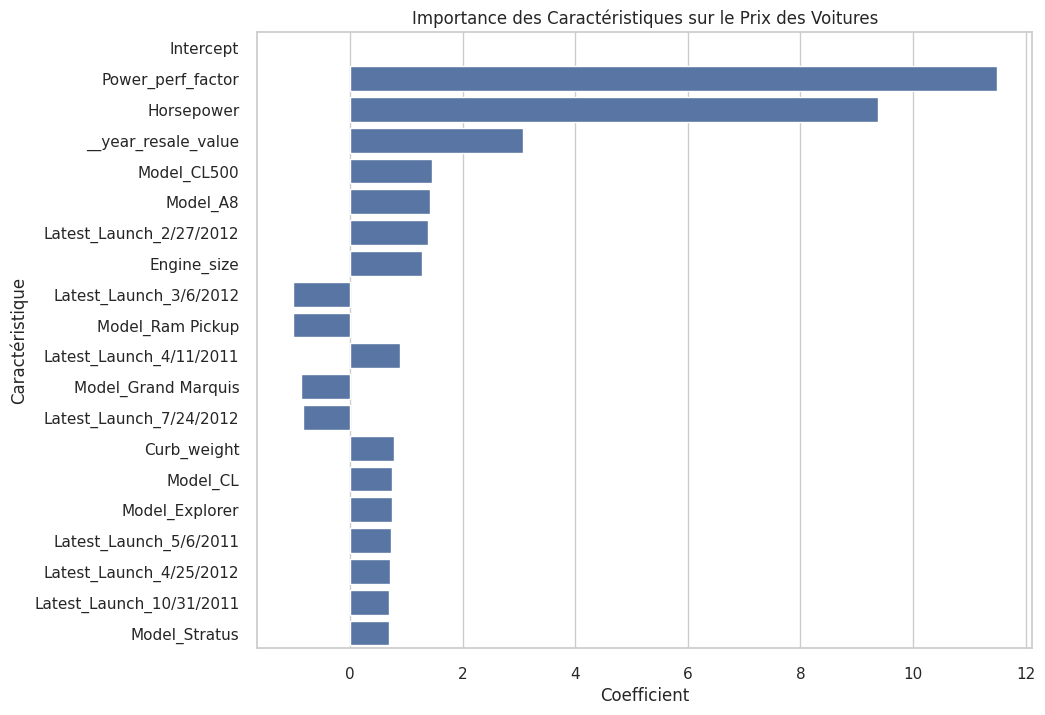

In [161]:
# Assuming coefficients_df_sorted is correctly prepared and does not contain unhashable types
top_features = coefficients_df_sorted.head(20)

# Plotting
plt.figure(figsize=(10, 8))
# Ensure the data does not contain unhashable types by checking the types of 'Feature' and 'Coefficient' columns
print(top_features.dtypes)  # This line is for debugging purposes to check the datatypes

# Convert 'Coefficient' and 'Abs_Coefficient' to numeric types
top_features['Coefficient'] = pd.to_numeric(top_features['Coefficient'], errors='coerce')
top_features['Abs_Coefficient'] = pd.to_numeric(top_features['Abs_Coefficient'], errors='coerce')

# Now, let's attempt the plot again
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Importance des Caractéristiques sur le Prix des Voitures')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristique')
plt.show()


## Conclusion

Notre analyse approfondie des données sur les ventes de voitures a mis en lumière l'importance cruciale de plusieurs facteurs déterminant le prix des voitures, notamment la puissance (horsepower), l'indice de performance énergétique (powerperf) et la valeur de revente annuelle (year resale value). Ces éléments se révèlent être des indicateurs clés influençant non seulement les décisions d'achat des consommateurs mais également la stratégie de tarification des fabricants.

La puissance du moteur, mesurée par le horsepower, est directement corrélée au prix, reflétant la demande des consommateurs pour des véhicules plus performants. L'indice de performance énergétique (powerperf), qui combine l'efficacité énergétique avec la puissance, est devenu un facteur de plus en plus significatif, soulignant l'importance croissante de la durabilité et de l'économie de carburant dans les préférences des consommateurs. De plus, la valeur de revente annuelle émerge comme un indicateur critique, indiquant que les consommateurs prennent en compte le coût total de possession lors de l'achat d'un véhicule.

Ces découvertes suggèrent que pour rester compétitifs, les fabricants de voitures doivent se concentrer non seulement sur l'amélioration de la performance et de l'efficacité énergétique de leurs véhicules mais aussi sur le maintien de valeurs de revente élevées. Cela implique un engagement envers la qualité, la durabilité et la technologie innovante qui peut augmenter la valeur perçue des véhicules sur le long terme.

En conclusion, cette étude offre des insights précieux pour les fabricants et concessionnaires, en soulignant l'importance de ces trois facteurs clés dans la détermination du prix des voitures. Les acteurs de l'industrie automobile qui ajustent leur stratégie en conséquence auront une meilleure chance de répondre aux attentes des consommateurs et de renforcer leur position sur le marché.
